# Sales Method analysis

In [1]:
import pandas as pd 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
from scipy import stats
import seaborn as sns

In [2]:
sales=pd.read_csv('product_sales.csv')
sales.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [3]:
sales.shape

(15000, 8)

In [4]:
sales.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [5]:
sales.groupby(by='week').agg({'week':'count'})


,week
week,
1,3721
2,2491
3,2411
4,2575
5,2574
6,1228


In [6]:
sales[['week']].value_counts()

week
1       3721
4       2575
5       2574
2       2491
3       2411
6       1228
dtype: int64

In [7]:
sales[['sales_method']].value_counts()


sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
dtype: int64

In [8]:
sales.replace(to_replace={'email':'Email','em + call':'Email + Call'},inplace=True)

In [9]:
sales[['customer_id']].nunique()

customer_id    15000
dtype: int64

In [10]:
sales[['nb_sold']].nunique()

nb_sold    10
dtype: int64

In [11]:
sales[['revenue']].isna().sum()

revenue    1074
dtype: int64

In [12]:
#number of imposible values ( years as customer >39 years)
to_drop=sales.query('years_as_customer>(2023-1984)').index.tolist()


In [13]:
sales.drop(index=to_drop,inplace=True)

In [14]:
sales[['nb_site_visits']].value_counts()

nb_site_visits
25                1688
26                1645
24                1600
23                1478
27                1439
22                1200
28                1175
21                 908
29                 893
30                 654
20                 600
19                 426
31                 371
32                 250
18                 217
33                 114
17                 113
16                  80
34                  51
35                  33
15                  31
36                  14
14                   7
37                   5
13                   4
12                   1
41                   1
dtype: int64

In [15]:
sales[['state']].value_counts()

state         
California        1870
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Louisiana          230
Colorado           230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana            

In [16]:
sales[['state']].nunique()

state    50
dtype: int64

# Missing values

I will first check if there are missing values in the dataset: 

<AxesSubplot:title={'center':'Null Values by columns'}>

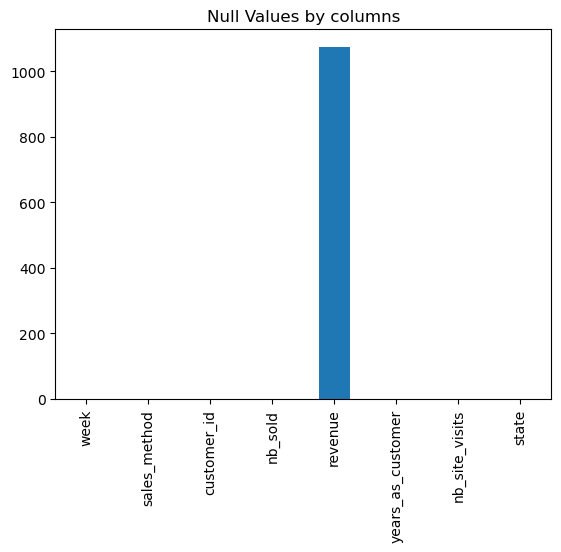

In [17]:
sales.isna().sum().plot(kind='bar',title='Null Values by columns')

**Distribution of Missing values  :** 

Before I delete rows with missing values. I will make sure that the missing values arent from a particular category.

If they are we should inform the data collection team and they should take the apropiate steps to solve the issue.

In [18]:
sales['null_revenue']=sales['revenue'].isna()

<AxesSubplot:title={'center':'Missing data values by week'}, xlabel='week'>

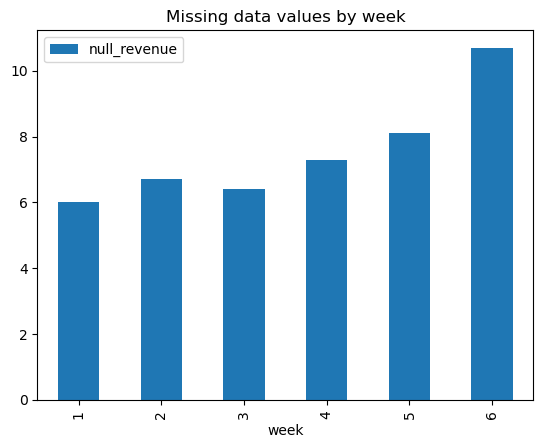

In [19]:
# percentage of null values :

group_by_week=sales.pivot_table(index='week',values='null_revenue')
group_by_week['null_revenue']*=100
group_by_week.round(decimals=1).plot(kind='bar',title='Missing data values by week')

<AxesSubplot:title={'center':'missing data by sales method'}, xlabel='sales_method'>

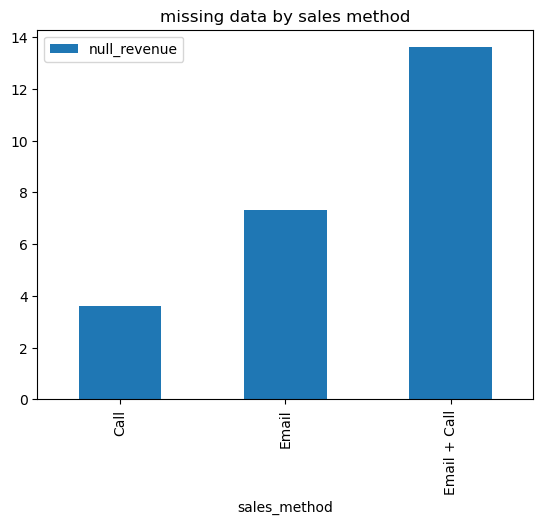

In [20]:

group_by_method=sales.pivot_table(index='sales_method',values='null_revenue')
group_by_method['null_revenue']*=100
group_by_method.round(decimals=1).plot(kind='bar',title='missing data by sales method')

<AxesSubplot:title={'center':'missing data by state'}, xlabel='state'>

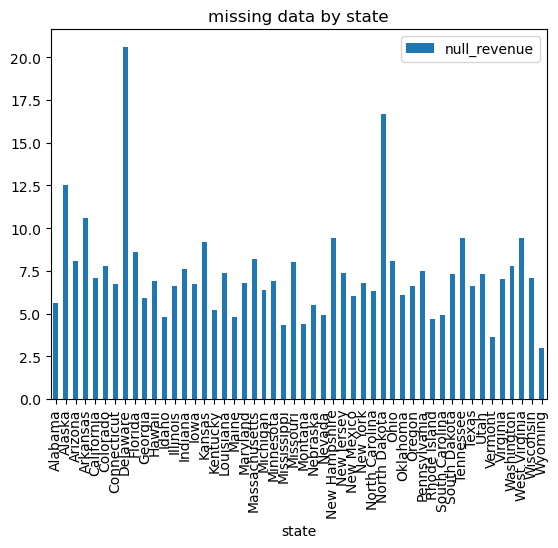

In [21]:
group_by_state=sales.pivot_table(index='state',values='null_revenue')
group_by_state['null_revenue']*=100
group_by_state.round(decimals=1).plot(kind='bar',title= 'missing data by state')



The missing values dont come from a particular category.

I will be deleting rows containing null values from the dataset 

In [22]:
sales.dropna(inplace=True)
sales.drop(columns=['null_revenue'],inplace=True)
sales.shape

(13924, 8)

# Data validation 

The dataset contains 15000 rows and 8 columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:
1. week: Weeks from 1 to 6 withouth missing values dtype is int64. No cleaning needed 
2. sales_method: Should be one of three values ( 'Email','Call','Email + Call').However We also find entries of 'em + call' and 'email'. I replace 'email' with 'Email' and 'em + call' with 'Email + Call'. No further cleaning needed
3. customer_id: 15000 unique customer_id values. No cleaning needed
4. nb_sold: Number of products sold.10 unique values and no missing values dtype is int64. No cleaning needed
5. revenue: revenue from the sales dtype is float64. there are 1074 missing values. I first checked if  the missing values are from a specific week,sales method or state. The values are missing at random so we can delete all rows with a missing revenue value for future analisys.
6. years_as_customer:Number of years customer has been buying from the company. The company has ben open for business since 1984 (39 years).There are two entries of customers with more than 39years as customers. Those will be deleted 
7. nb_site_visits: number of times the customer has visited our website in the last 6 months. dtype is int64.No cleaning needed
8. state: Location of the customer. There are 50 unique values. Each corresponding to a different state . No cleaning needed  

**After data validation, the dataset contains 13924 rows and 8 columns without missing values.**

# How many customers were there for each approach?

In [23]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia


In [24]:
customers_per_approach=pd.pivot_table(sales,values='customer_id',index='sales_method',aggfunc=('count'))
customers_per_approach.rename(columns={'customer_id':'number_of_customers'},inplace=True)
customers_per_approach['percentage_of_total']=(customers_per_approach['number_of_customers']/customers_per_approach['number_of_customers'].sum()*100).round(decimals=1)
customers_per_approach.head()

,number_of_customers,percentage_of_total
sales_method,,
Call,4780,34.3
Email,6921,49.7
Email + Call,2223,16.0


<AxesSubplot:title={'center':'Customers by sales method'}, xlabel='sales_method'>

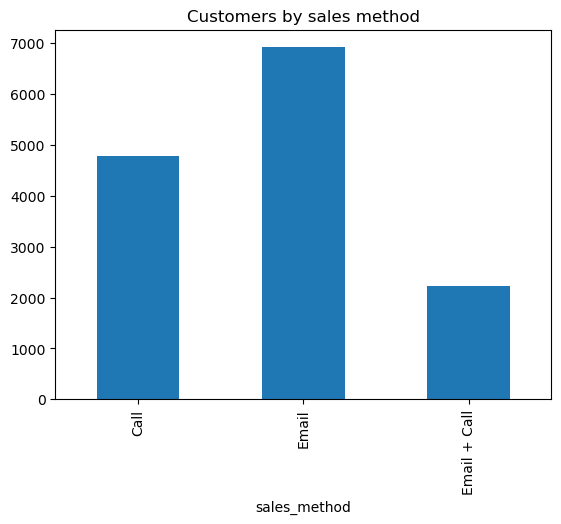

In [26]:
customers_per_approach['number_of_customers'].plot(kind='bar',title='Customers by sales method',legend=False)

 The group of customers in the Email group is the biggest of the three,with 6921 customers, followed by Call with 4780, and lastly Email + Call  with only 2223.
 
 The sales method that got the most customers are in order:
1. **Email** with **49.7%** of the total
2. **Call** with **34.3%** of the total
3. **Email + Call** with **16%** of the total

# Revenue per approach

In [27]:
r=pd.pivot_table(sales,index='sales_method',values='revenue',aggfunc=np.sum)
r['percentage_of_total']=(r['revenue']/r['revenue'].sum()*100).round(decimals=1)
r
#r.sort_values()
#r_tot.loc['Total']=r_tot.sum()
#r_tot

,revenue,percentage_of_total
sales_method,,
Call,227513.02,17.4
Email,672220.61,51.4
Email + Call,408256.69,31.2


The sales method that generated the most revenue are in order:
1.  **Email** with **51.4%** of the total
2.  **Email + Call** with **31.2%** of the total
3.  **Call** with **17.4%** of the total

<AxesSubplot:title={'center':'Total Revenue by sales method'}, xlabel='sales_method'>

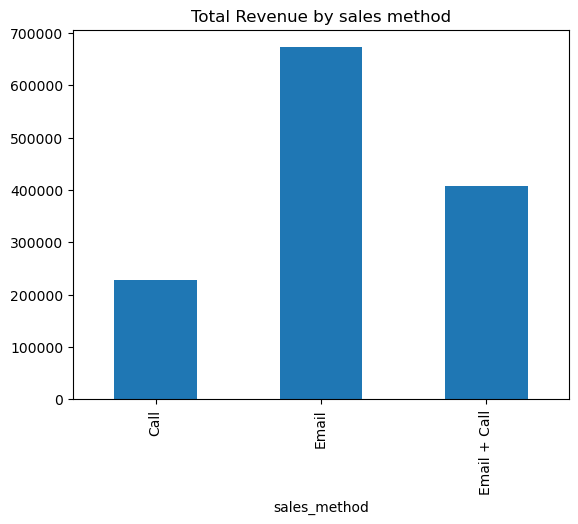

In [28]:
r['revenue'].plot(kind='bar',title='Total Revenue by sales method')

# Spread of revenue

# Distribution of revenue per customer :

In [29]:
r=sales['revenue'].describe() 
r.round(1)

#print(f' mean:{round(r[1],2)} \n std:{round(r[2],2)} \n min:{r[3]} \n max:{r[7]} \n 25%:{r[4]} \n 50%:{r[5]} \n 75%:{r[6]}')

count    13924.0
mean        93.9
std         47.4
min         32.5
25%         52.5
50%         89.5
75%        107.3
max        238.3
Name: revenue, dtype: float64

- The **average** revenue generated per customer is **93.9**
- The **25 percentile** of revenue per customer is **52.5**
- the **75 percentile** of revenue per customer is **107.3**
- the **50 percentile** of revenue per customer is **89.5**
- the **max revenue** by a single customer is **238.3** 
- the **min revenue** by a single customer is **32.5**

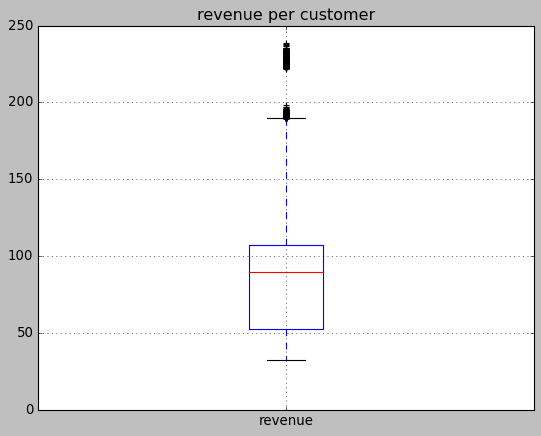

In [30]:
# box plot 
plt.style.use('classic')
sales.boxplot(column='revenue').set_title('revenue per customer')
plt.suptitle('')
plt.show()
#sns.boxplot(data=sales,y='revenue',width=0.3,fliersize=3)
#sales.plot(kind='box',x='revenue')

# Distribution of revenue per sales method :

In [31]:
r=pd.pivot_table(sales,index='customer_id',values='revenue',columns='sales_method')
distribution=r.describe().round(decimals=1)
distribution.drop(index=['count'],inplace=True)
distribution

sales_method,Call,Email,Email + Call
mean,47.6,97.1,183.7
std,8.6,11.2,29.1
min,32.5,78.8,122.1
25%,41.5,87.9,155.8
50%,49.0,95.6,184.7
75%,52.7,105.2,191.1
max,71.4,149.0,238.3


By separating the revenue per customer by sales method we can gain a few more insights:

- **Email + Call** generated the **most revenue** per customer on average : **183.7** .But it also had the more spread (std=29.1)


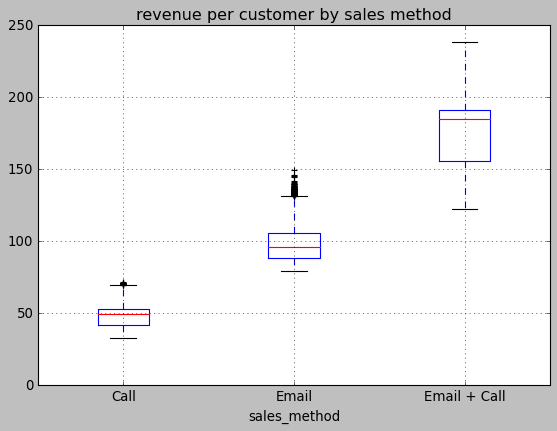

In [32]:
sales.boxplot(column='revenue',by='sales_method').set_title('revenue per customer by sales method')
plt.suptitle('')
plt.show()

We can also see that:
- Customers in the **Email + Call** group, on average, **bought more units** of the new products

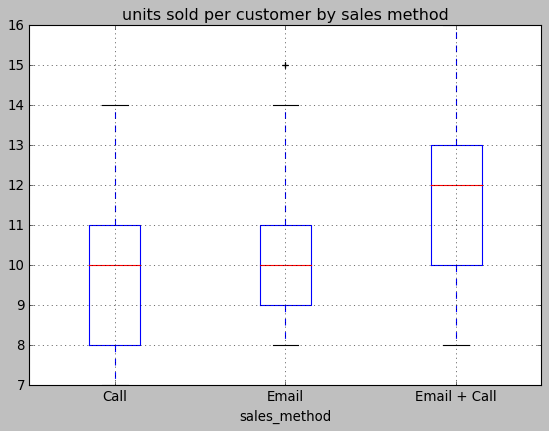

In [33]:
sales.boxplot(column='nb_sold',by='sales_method').set_title('units sold per customer by sales method')
plt.suptitle('')
plt.show()

In [34]:
r=pd.pivot_table(sales,index='customer_id',values='nb_sold',columns='sales_method')
r.describe().round(decimals=2)

sales_method,Call,Email,Email + Call
count,4780.00,6921.00,2223.00
mean,9.50,9.72,12.19
std,1.73,1.18,1.93
min,7.00,8.00,8.00
25%,8.00,9.00,10.00
50%,10.00,10.00,12.00
75%,11.00,11.00,13.00
max,14.00,15.00,16.00


# Revenue over time per method:

**Total revenue over time by sales method:**

In [35]:
revenue_per_week=pd.pivot_table(sales,index='week',values='revenue',columns='sales_method',aggfunc=np.sum)
revenue_per_week.round(decimals=2)


sales_method,Call,Email,Email + Call
week,,,
1,26159.18,229765.55,16885.33
2,33792.02,137794.35,26376.23
3,36247.27,98792.14,48737.14
4,49543.52,107788.37,78296.20
5,53518.11,74373.45,126809.72
6,28252.92,23706.75,111152.07


**Revenue over time by sales method.Normalized by week :**

In [36]:
revenue_per_week_perc=pd.crosstab(index=sales['week'],values=sales['revenue'],columns=sales['sales_method'],aggfunc=np.sum,normalize='index')
revenue_per_week_perc=(revenue_per_week_perc*100).round(decimals=1)

revenue_per_week_perc= revenue_per_week_perc.astype('str')+ ' %'
revenue_per_week_perc

sales_method,Call,Email,Email + Call
week,,,
1,9.6 %,84.2 %,6.2 %
2,17.1 %,69.6 %,13.3 %
3,19.7 %,53.8 %,26.5 %
4,21.0 %,45.7 %,33.2 %
5,21.0 %,29.2 %,49.8 %
6,17.3 %,14.5 %,68.1 %


Having grouped the total revenue by sales method over time we can make the following statements:
- **Email** is the method that **starts with the most revenue: 84.2%** of the total. But it **decreases** over time **to 14.5%** of the total
- **Email + Call starts as the lowest revenue: 6.2%** of the total. But it **increases** over time **to 68.1%**
- **Call** method **stays steady at around 20%** of the total revenue 

<AxesSubplot:title={'center':'Total Revenue over time by sales method'}, xlabel='week'>

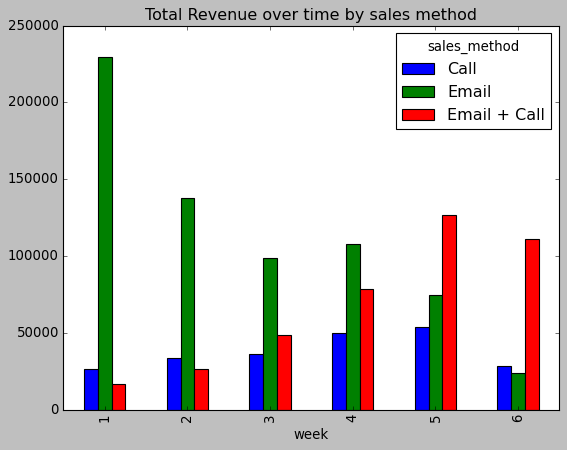

In [37]:
revenue_per_week.plot(kind='bar',title='Total Revenue over time by sales method')

# Wich sales method should we continue to use 

From the data we can see that the Call method performed the worst in multiple metrics: 
- Number of Customers: **2nd** with 34.3% of the customers 
- Total Revenue: **3rd** with 17.4% of the total revenue 
- Revenue per customer: **3rd** with an average revenue of 47.6 per customer
- Units sold per customer: **3rd** with an average of 10 units sold per customer 
- Revenue over time: It is **outperformed by Email** in the **first 5 weeks** a**nd by Email+Call** in the **last 4 weeks**
And if we add the fact that **each call takes 30 min** of time for our employees. 


From the other two methods we can say:

**Email**:
- Most total customers and the most total revenue
- Most revenue per week the first 4 weeks 
- Demands the least work

**Email + Call**:
- Most revenue per customer: 183 vs 97
- More revenue each week, and it starts to outperform Email by week 4
- Can capture the clients from the Email group and the Call group

**Conclussion:**

**EMAIL + CALL METHOD IS THE BETTER OPTION**:

  If we would have used Email + Call as our only sales method the company would have gotten almost the same revenue in week 1. But the following weeks the revenue would have been aproximately the sum of all the methods, as customers who bought by email would still be getting one, and people who bought because they were called will still be getting a call. 
 

In [38]:
r=revenue_per_week
proyected_sales=revenue_per_week
proyected_sales['Email + Call']=r['Call']+r['Email']+r['Email + Call']
proyected_sales.drop(columns='Call',inplace=True)
proyected_sales

sales_method,Email,Email + Call
week,,
1,229765.55,272810.06
2,137794.35,197962.60
3,98792.14,183776.55
4,107788.37,235628.09
5,74373.45,254701.28
6,23706.75,163111.74


<AxesSubplot:title={'center':'Protected Revenue by method'}, xlabel='week'>

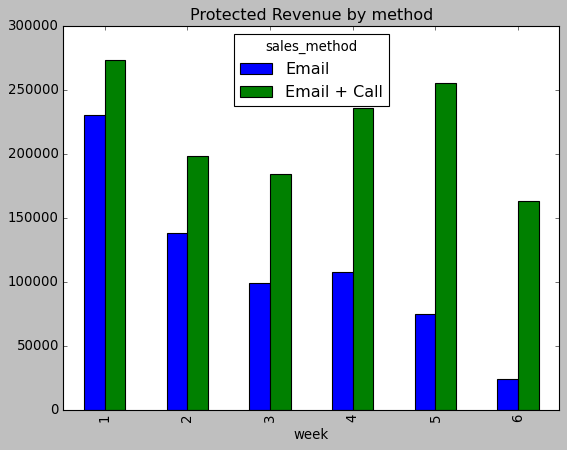

In [39]:
proyected_sales.plot(kind='bar',title='Protected Revenue by method')

# Most popular sales method by state 

In [50]:
sales_per_state=pd.crosstab(index=sales['state'],columns=sales['sales_method'],values=sales['customer_id'],aggfunc='count',normalize='index')
sales_per_state=(sales_per_state*100).round(decimals=0)
sales_per_state['prefered_method']=sales_per_state.idxmax(axis=1)
sales_per_state.sort_values('prefered_method').head()

sales_method,Call,Email,Email + Call,prefered_method
state,,,,
Arkansas,42.0,42.0,17.0,Call
Alabama,30.0,53.0,17.0,Email
Nevada,27.0,57.0,16.0,Email
New Hampshire,33.0,56.0,10.0,Email
New Jersey,39.0,46.0,15.0,Email


It could also be interesting to investigate if there is a difference in sales method between customers from each state:

If we group the customer by their states there is only one state where Email is not the sales method prefered by customers: 

In the state of **Arkansas** **customers prefer to be Called** rather than Emailed

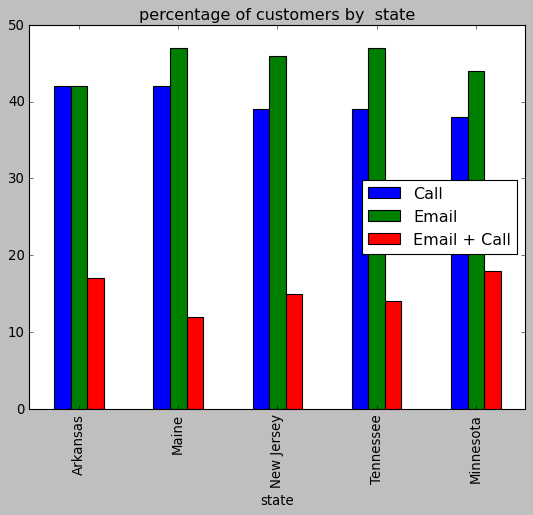

In [41]:
sales_per_state.sort_values('Call',ascending=False).head(5).plot(kind='bar',title='percentage of customers by  state').legend(loc='right')

# Most popular sales method by years as customer 

In [42]:
y=pd.pivot_table(sales,index='customer_id',values='years_as_customer',columns='sales_method')
distribution=y.describe().round(decimals=2)
distribution.drop(index=['count'],inplace=True)
distribution

sales_method,Call,Email,Email + Call
mean,5.15,4.99,4.53
std,5.09,5.04,4.72
min,0.00,0.00,0.00
25%,1.00,1.00,1.00
50%,4.00,4.00,3.00
75%,7.00,7.00,6.00
max,38.00,39.00,37.00


By ploting the age distribution of customers in each sales method we see that :

More **recent clients** tend to buy more by **Email** and **Email + Call**.

**But the difference is small** :
- Call: 5.15 years as customer on average
- Email: 4.99 years as customer on average
- Email + Call: 4.53 years as customer on average

Therefore I can conclude that:  
**There is not any significant difference** to merit a change in the way products are sold.


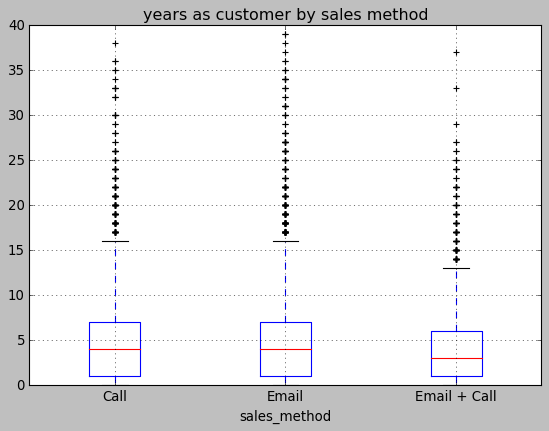

In [45]:
sales.boxplot(column='years_as_customer',by='sales_method').set_title('years as customer by sales method')
plt.suptitle('')
plt.show()

# Most popular sales method by site visits

In [46]:
s=pd.pivot_table(sales,index='customer_id',values='nb_site_visits',columns='sales_method')
distribution=s.describe().round(decimals=2)
distribution.drop(index=['count'],inplace=True)
distribution

sales_method,Call,Email,Email + Call
mean,24.42,24.73,26.74
std,3.59,3.27,3.37
min,12.00,13.00,14.00
25%,22.00,23.00,24.00
50%,24.00,25.00,27.00
75%,27.00,27.00,29.00
max,37.00,36.00,37.00


By ploting the site visits of customers in each sales method we see that :

Clients that bought by **Email** and **Email + Call** registered more site visits :

- Call: 24.42 site visits per customer on average
- Email: 24.73 site visits per customer on average
- Email + Call: 26.74 site visits per customer on average

Therefore I can conclude that:  
People who buy using **Email** and **Email + call** showed **more interest** in the company's website.


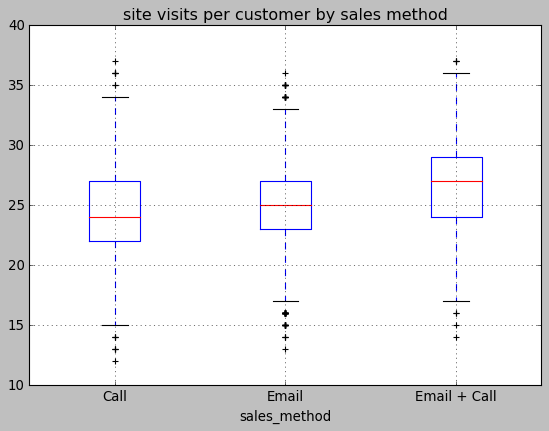

In [47]:
sales.boxplot(column='nb_site_visits',by='sales_method').set_title('site visits per customer by sales method')
plt.suptitle('')
plt.show()

# Site visits per state 

In [48]:
site_visits_per_state=pd.pivot_table(sales,index='state',values='nb_site_visits',aggfunc='mean')
site_visits_per_state_sorted=site_visits_per_state.round(2).sort_values('nb_site_visits',ascending=False)
site_visits_per_state_sorted.describe().round(2)

,nb_site_visits
count,50.00
mean,24.95
std,0.30
min,24.04
25%,24.83
50%,24.94
75%,25.14
max,25.77


By ploting the distribution of **site visits** of customers in each **state** we see that :

**There is not a big difference** in site visits from state to state : 

- standard deviation of 0.3 with a mean of 24.95

<AxesSubplot:title={'center':'Site visits per state'}>

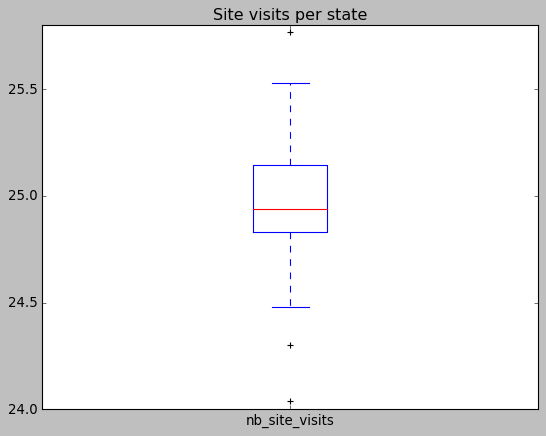

In [49]:
site_visits_per_state_sorted.plot(kind='box',title='Site visits per state')

# Recomendations:

- It is my suggestion that **the company stop using the Call method** for the next product launch 


- **The company should use the Email + Call method** for the next launch. As those 10 min of extra work in calls will be more than compensated by the increase in revenue in the weeks after product launch compared to using only Email.

- **Investigate** why are there **missing values** in the revenue field. Having more complete data will lead to more acurate analysis





# Business Metrics

Since our goal is to maximize revenue the main metric we should look at  is **Revenue by week** and **Total customers by week**  


Other important metric  should be **Difference in revenue by week** . That is, the gain or loss in revenue compared to the previous week. This metric should help us identify when a product is losing traction and the company can re-send emails  

**Expected  values**: 

Based on the current data **Revenue by week** and **Total customers by week** should be aproximately the sum of of all the methods used for the same product. But the next product launch will be obviously be different so **it is not possible to make a prediction** for a different product.

**Difference in revenue by week** This metric will also be **imposible to acurately predict for a diferent product** launch, but I expect to see a **positive difference** in revenue compared to a previous week **when the calls begin.**


